In [2]:
import pandas as pd

df = pd.read_csv("multilingual_train.tsv", sep='\t', names=['text', 'label'], header=0)
df.head()

,text,label
mul_train_00001,if i dey enter your eye or you like me and no ...,positive
mul_train_00002,@user @user Ndi igbo is na ara di na udi,negative
mul_train_00003,كاملين بيوكوم عنستفكوم من فوق شواية الا بنكيرا...,negative
mul_train_00004,SAMIA ATOA ANGALIZO KUIKABILI SARATANI Makamu ...,neutral
mul_train_00005,"5. Dùnùndún, ọ̀jọ̀jọ̀, ____ Ẹ̀bà, ____, àmàlà ...",neutral


In [7]:
print(f"Number of total examples {len(df)}")
print(f"# Positive examples {len(df[df['label'] == 'positive'])}")

print(f"# Negative examples {len(df[df['label'] == 'negative'])}")

print(f"# Neutral examples {len(df[df['label'] == 'neutral'])}")

Number of total examples 63685
# Positive examples 20783
# Negative examples 20108
# Neutral examples 22794


<AxesSubplot:xlabel='text', ylabel='Count'>

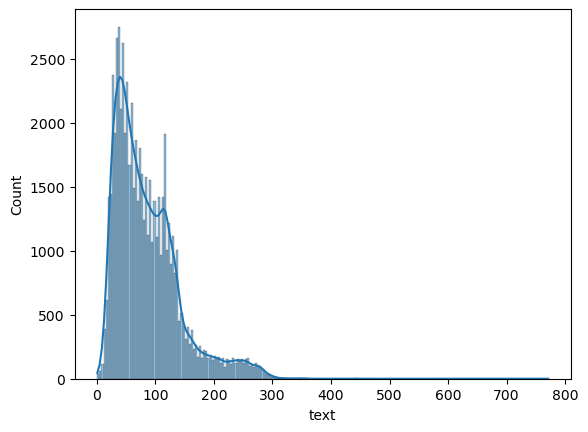

In [8]:
import seaborn as sns

sns.histplot(data=df, x=df['text'].apply(lambda x: len(x)), kde=True)

In [10]:
print(f"Max length of tweet: {df['text'].apply(lambda x: len(x)).max()}")
print(f"Minimum length of tweet: {df['text'].apply(lambda x: len(x)).min()}")
print(f"Average length of tweet: {df['text'].apply(lambda x: len(x)).mean()}")

Max length of tweet: 771
Minimum length of tweet: 1
Average length of tweet: 85.83788961293868


In [3]:
'text' in df

True

In [1]:
from bert_multilingual.utils import plot_met_curves
import pickle

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
def plot_met_curves(f1_met, loss_met, lang):
    '''
    plots f1 and loss curves
    '''
    train_val_f1_df = pd.DataFrame.from_dict(f1_met).reset_index().melt(id_vars=['index']).rename(columns={"index":"epochs"})
    train_val_loss_df = pd.DataFrame.from_dict(loss_met).reset_index().melt(id_vars=['index']).rename(columns={"index":"epochs"})

    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,7))

    sns.lineplot(data=train_val_f1_df, x = "epochs", y="value", hue="variable",  ax=axes[0]).set_title(f'{lang} Train-Val F1/Epoch')
    sns.lineplot(data=train_val_loss_df, x = "epochs", y="value", hue="variable", ax=axes[1]).set_title(f'{lang} Train-Val Loss/Epoch')
    
    plt.savefig(f'./bert_multilingual/results/{lang}_metrics.png')

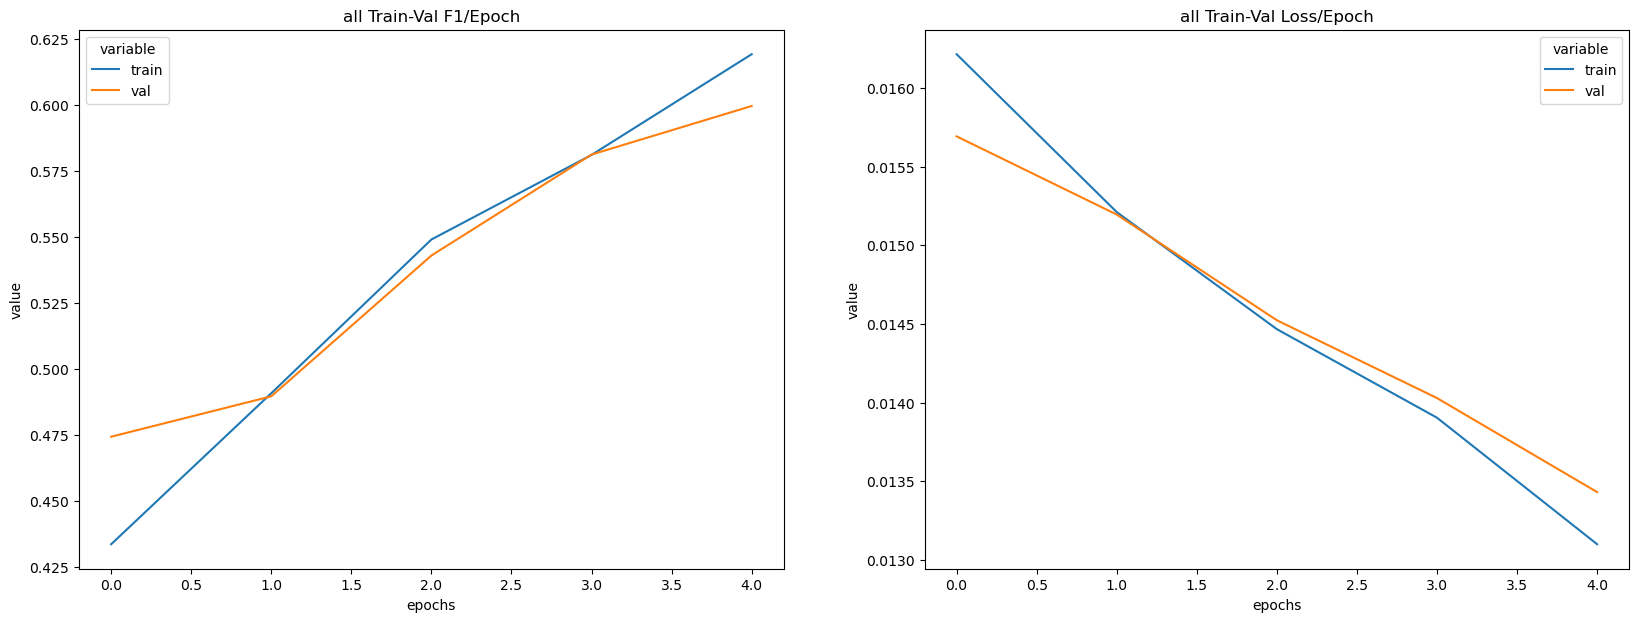

In [8]:
with open('./bert_multilingual/results/f1_met_all.pkl', 'rb') as f:
    f1_met = pickle.load(f)

with open('./bert_multilingual/results/loss_met_all.pkl', 'rb') as f:
    loss_met = pickle.load(f)

plot_met_curves(f1_met, loss_met, 'all')

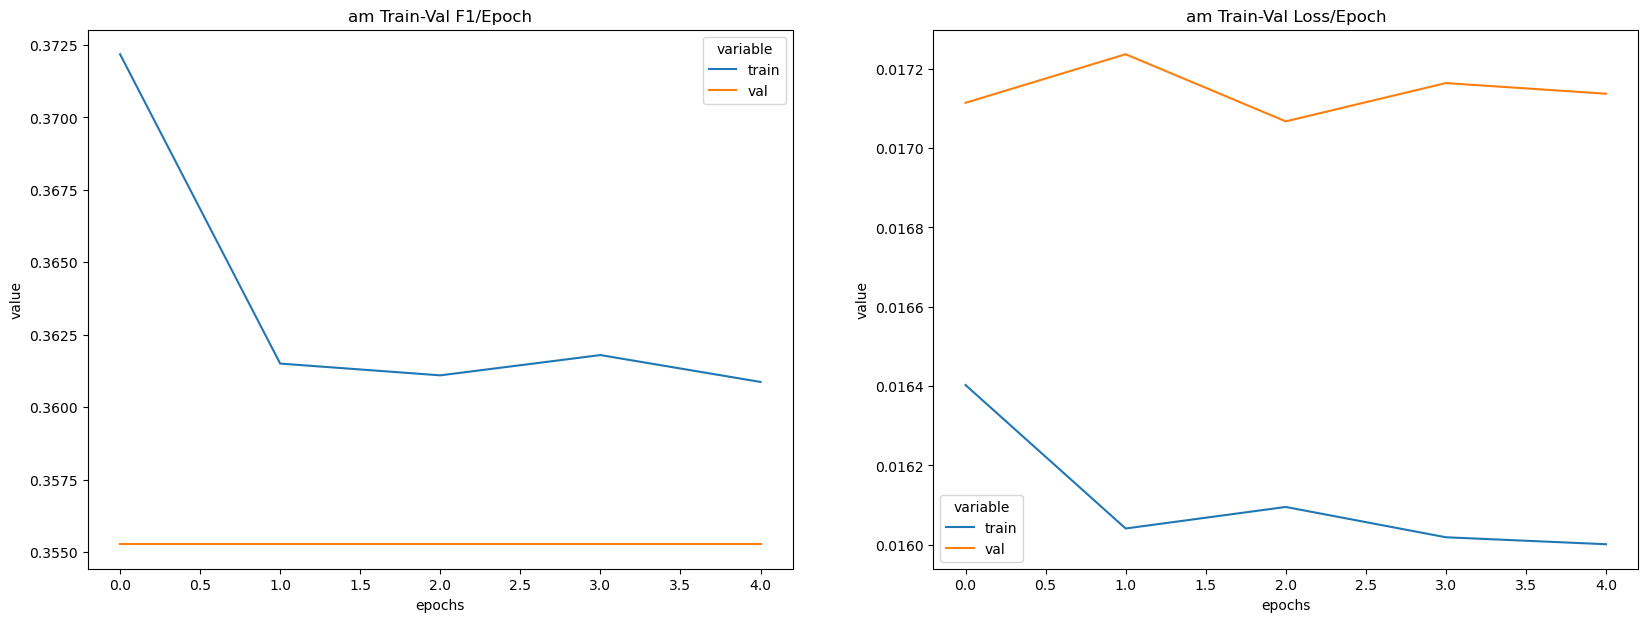

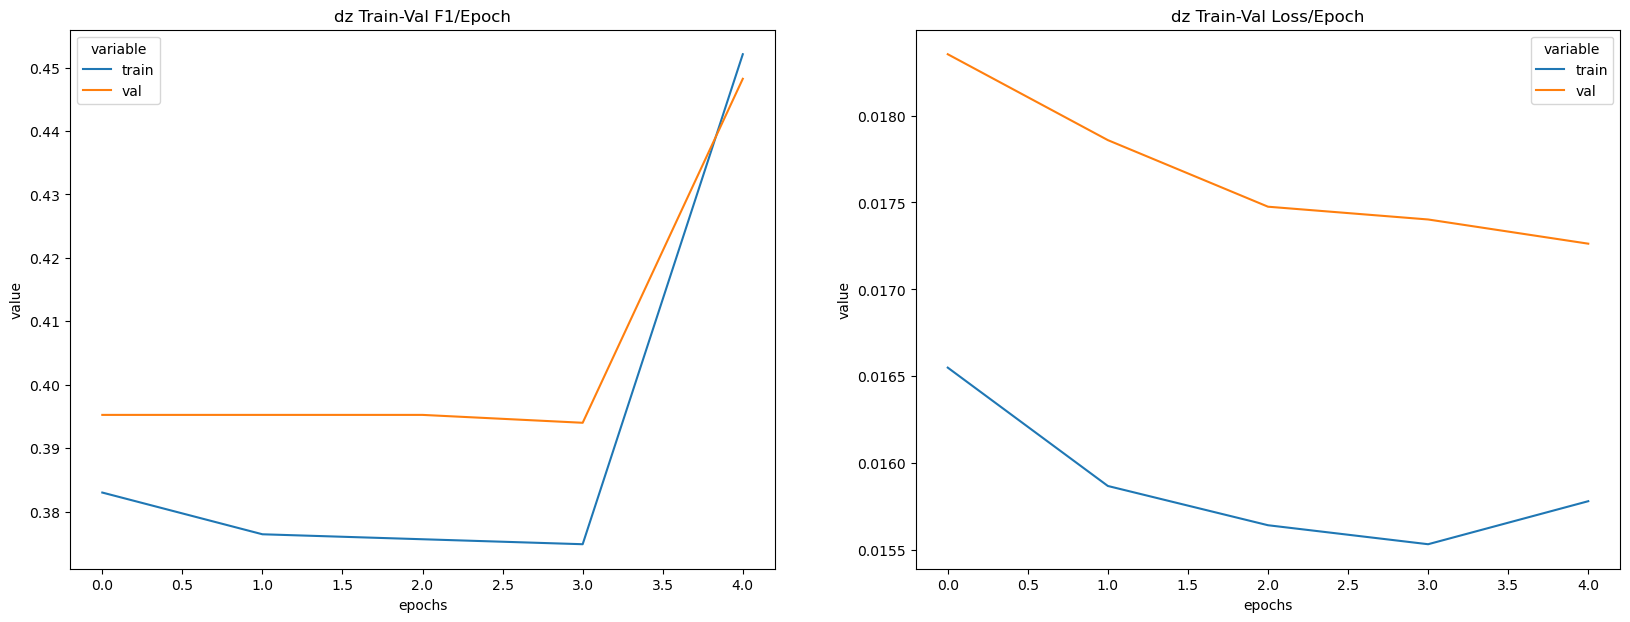

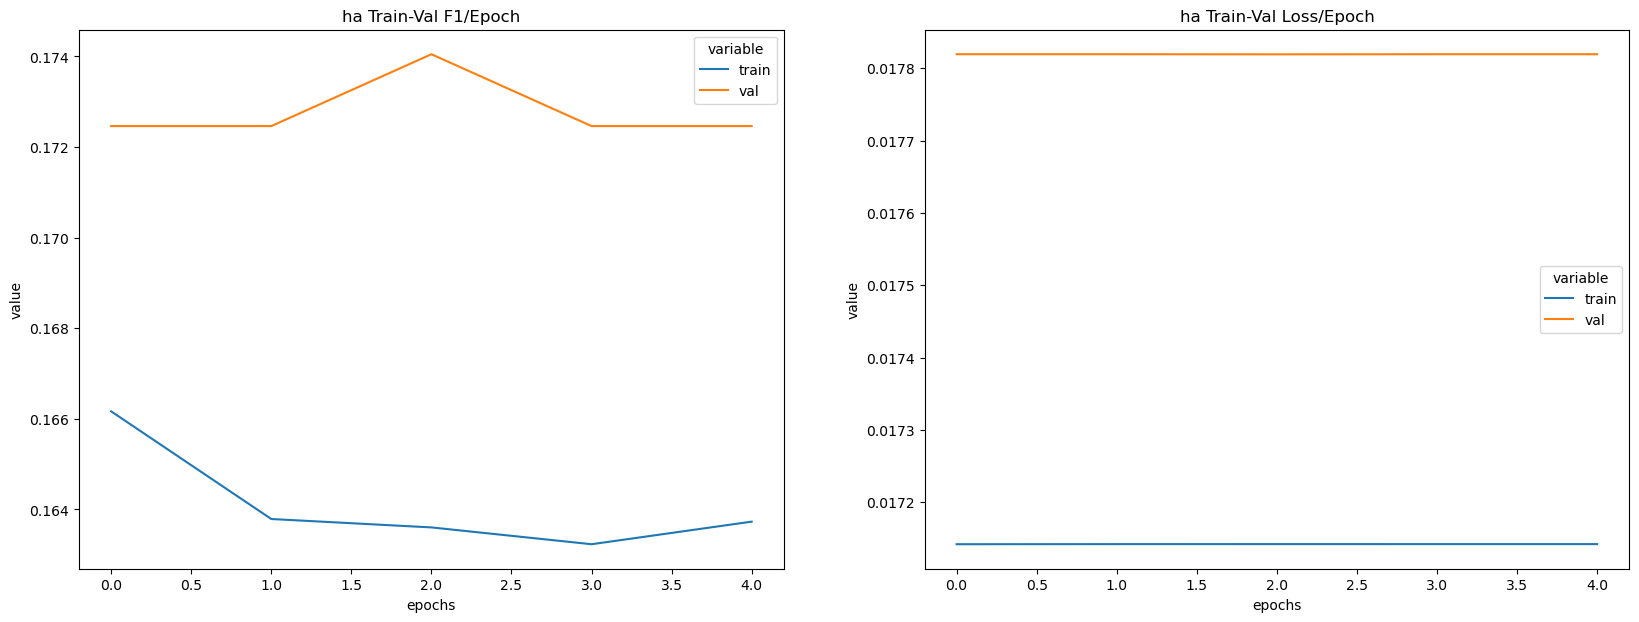

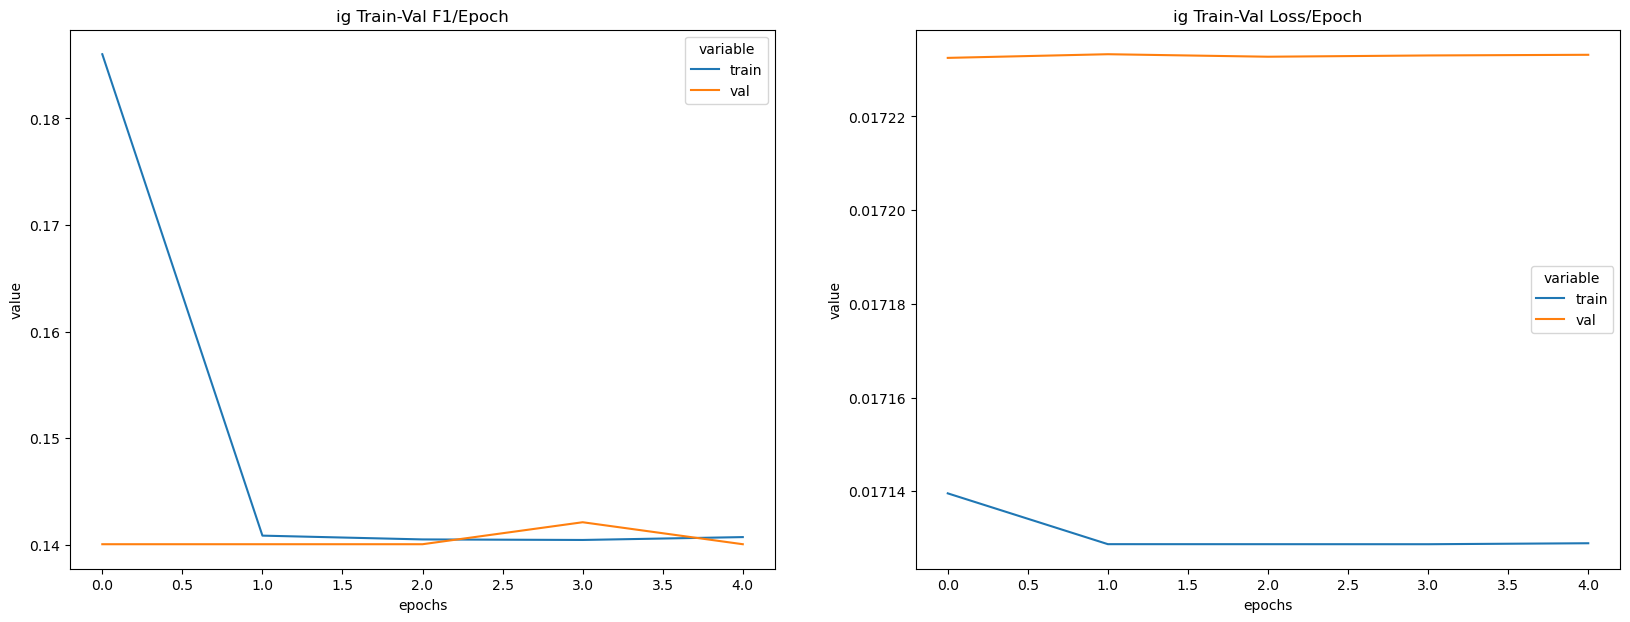

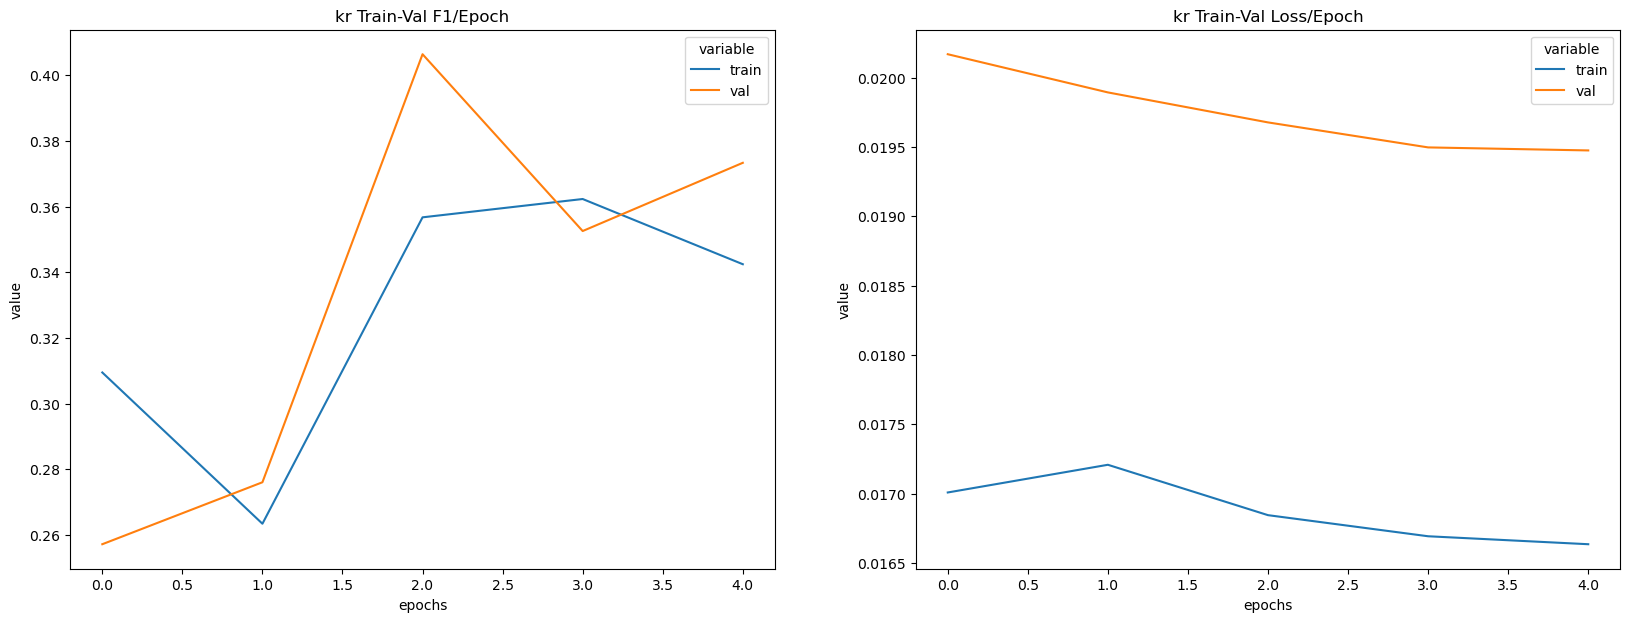

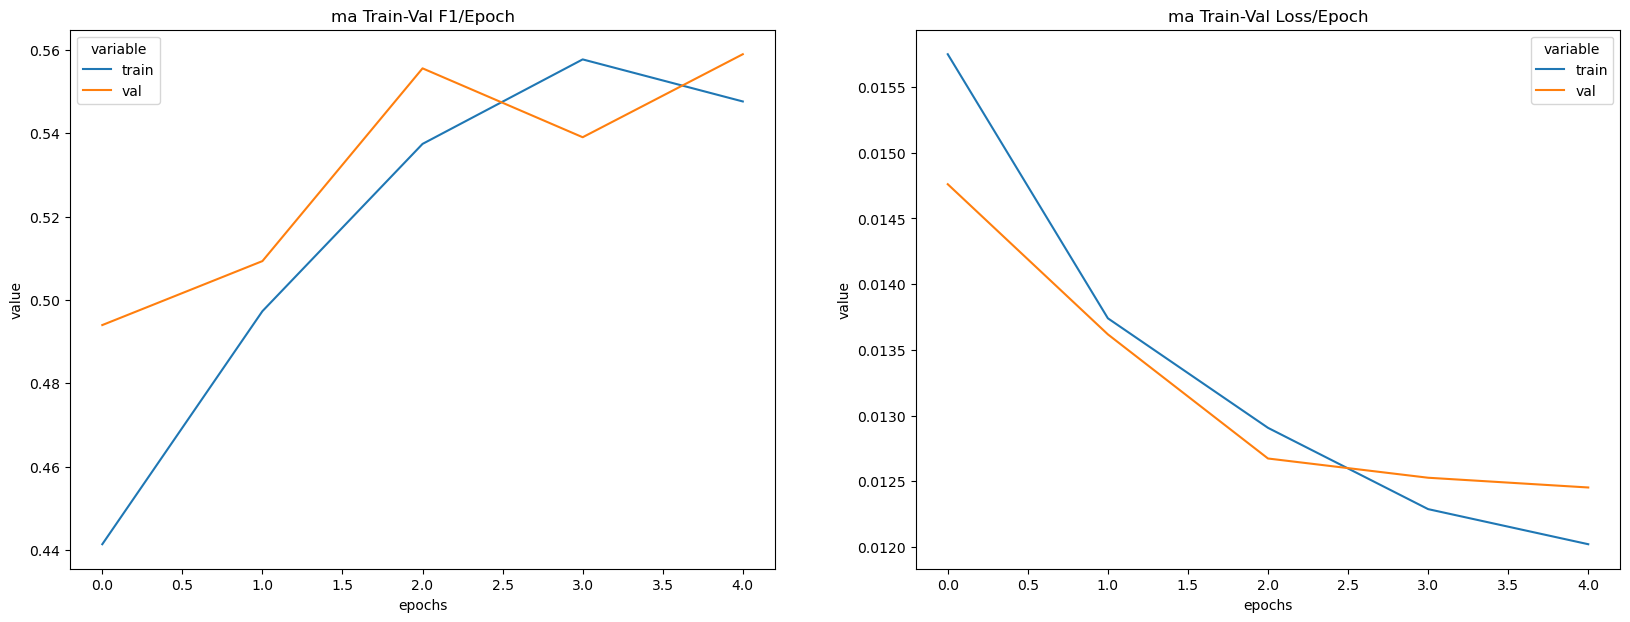

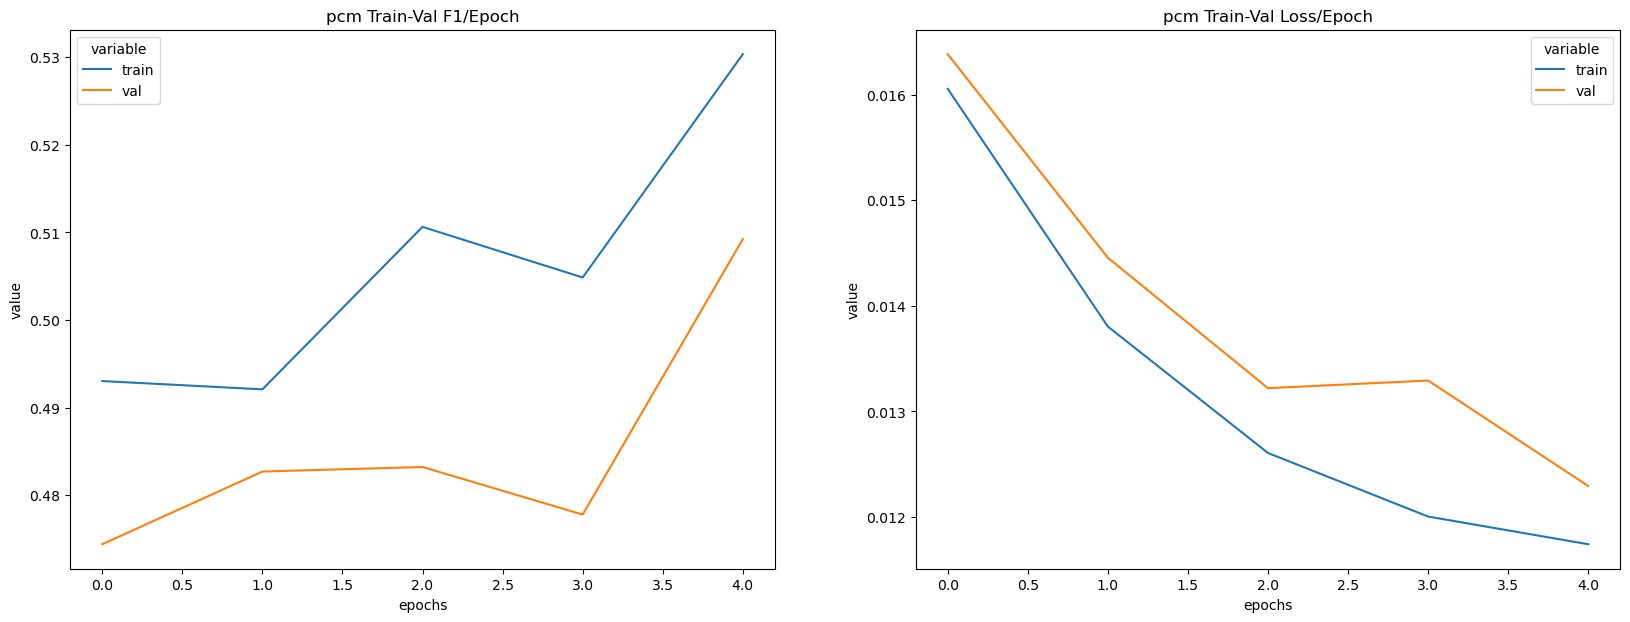

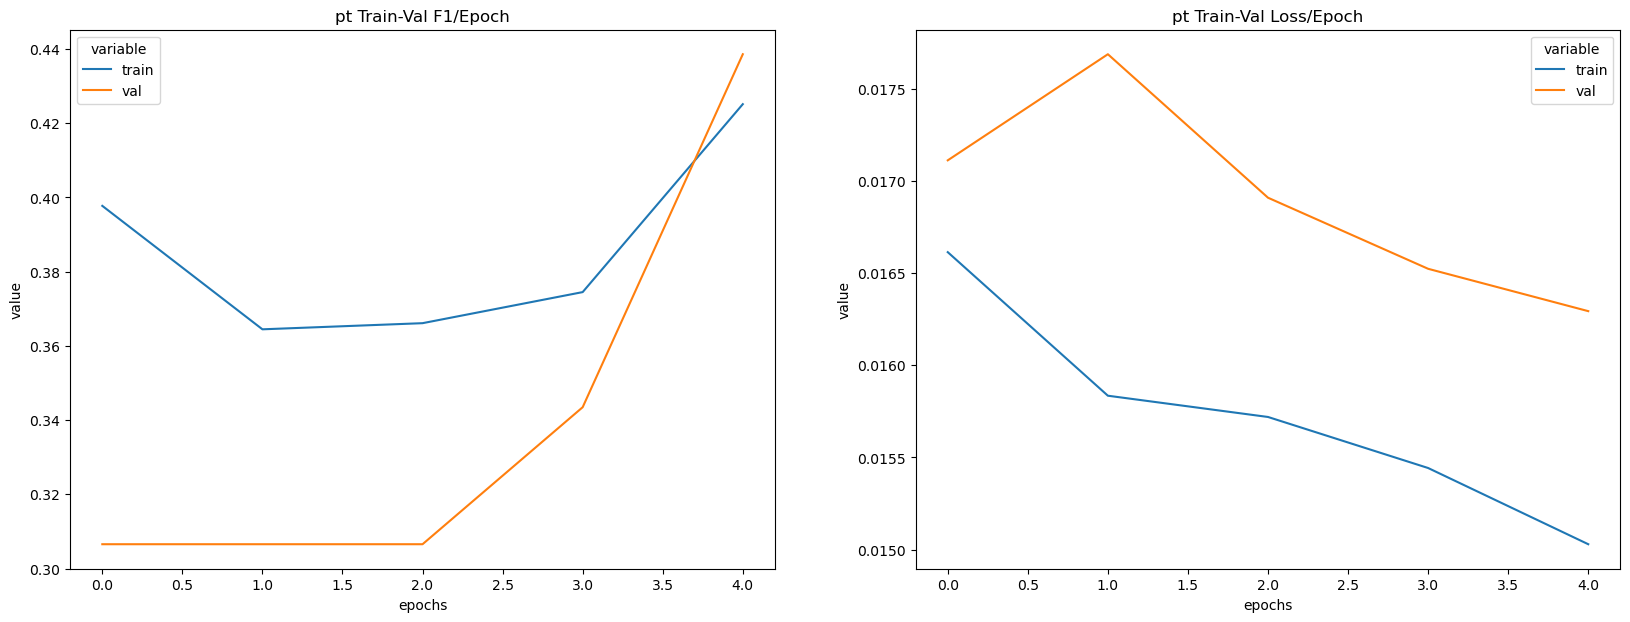

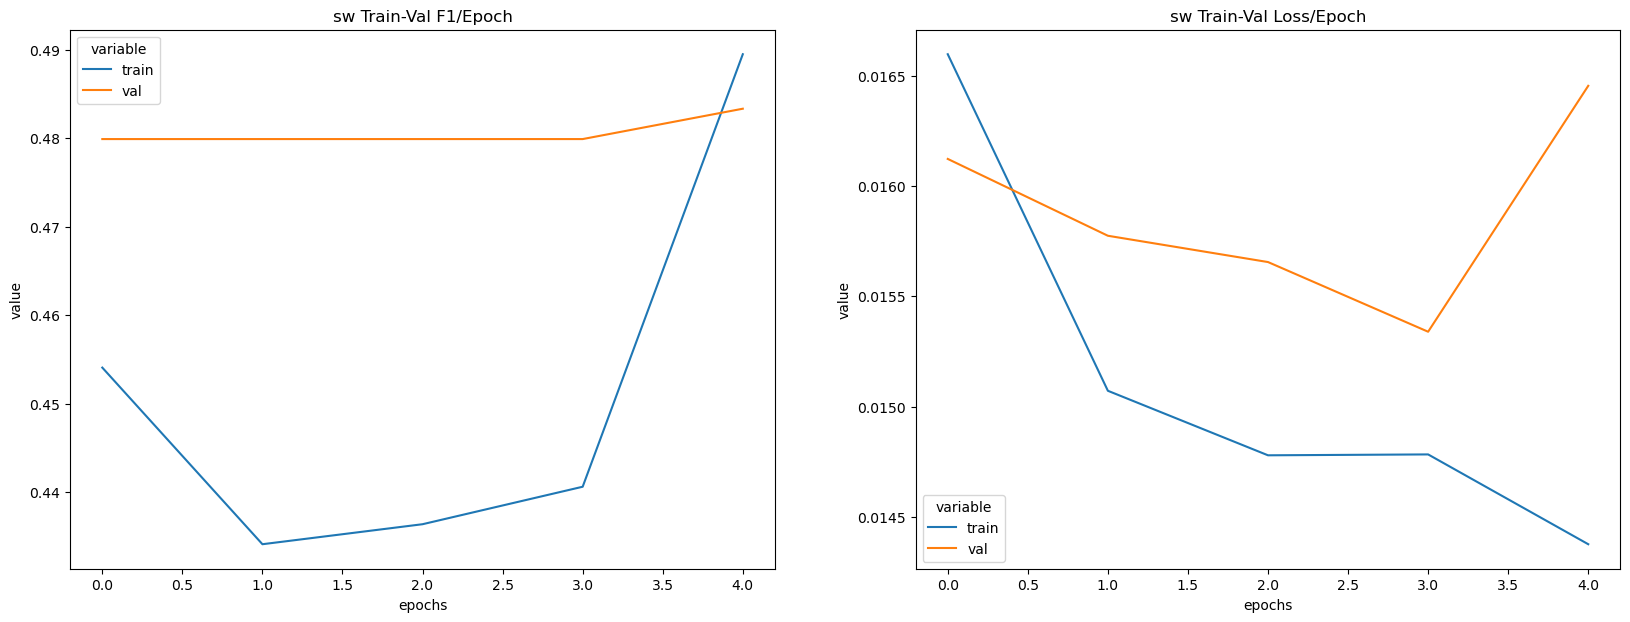

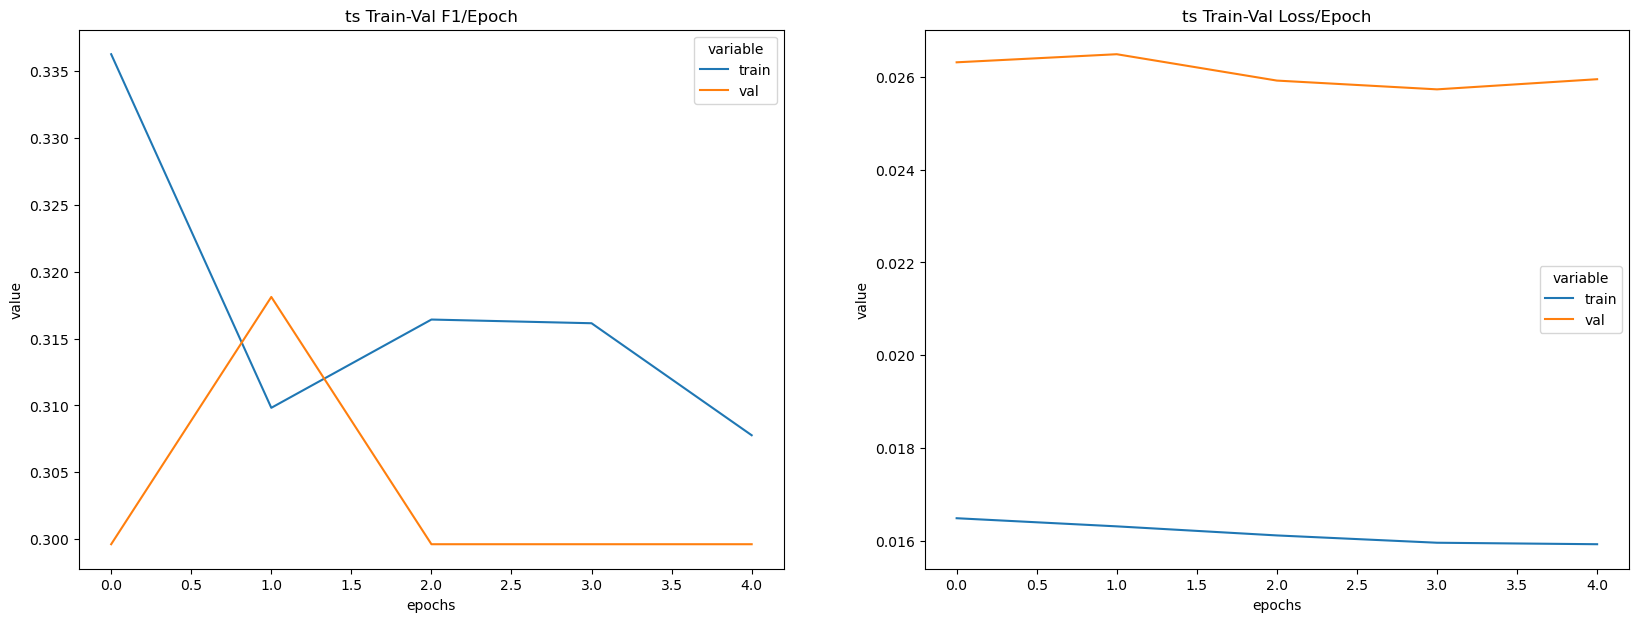

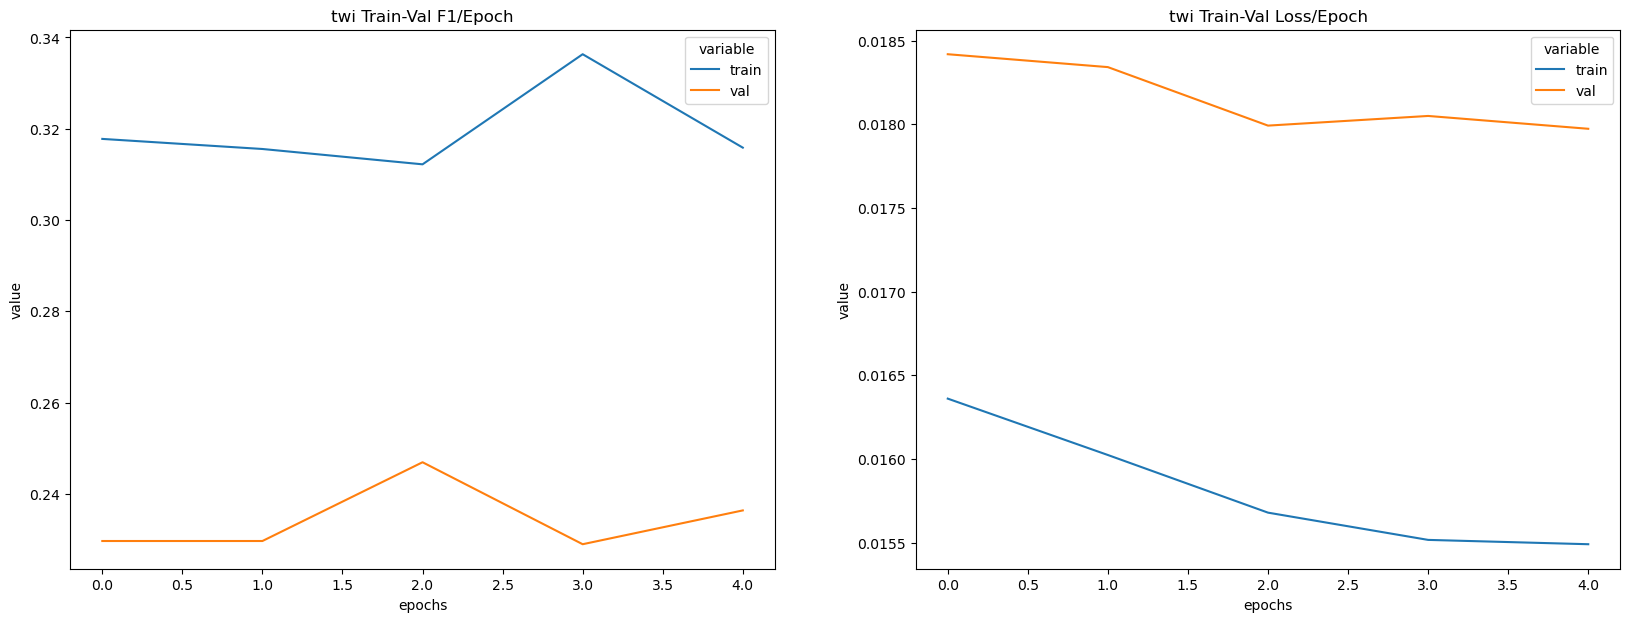

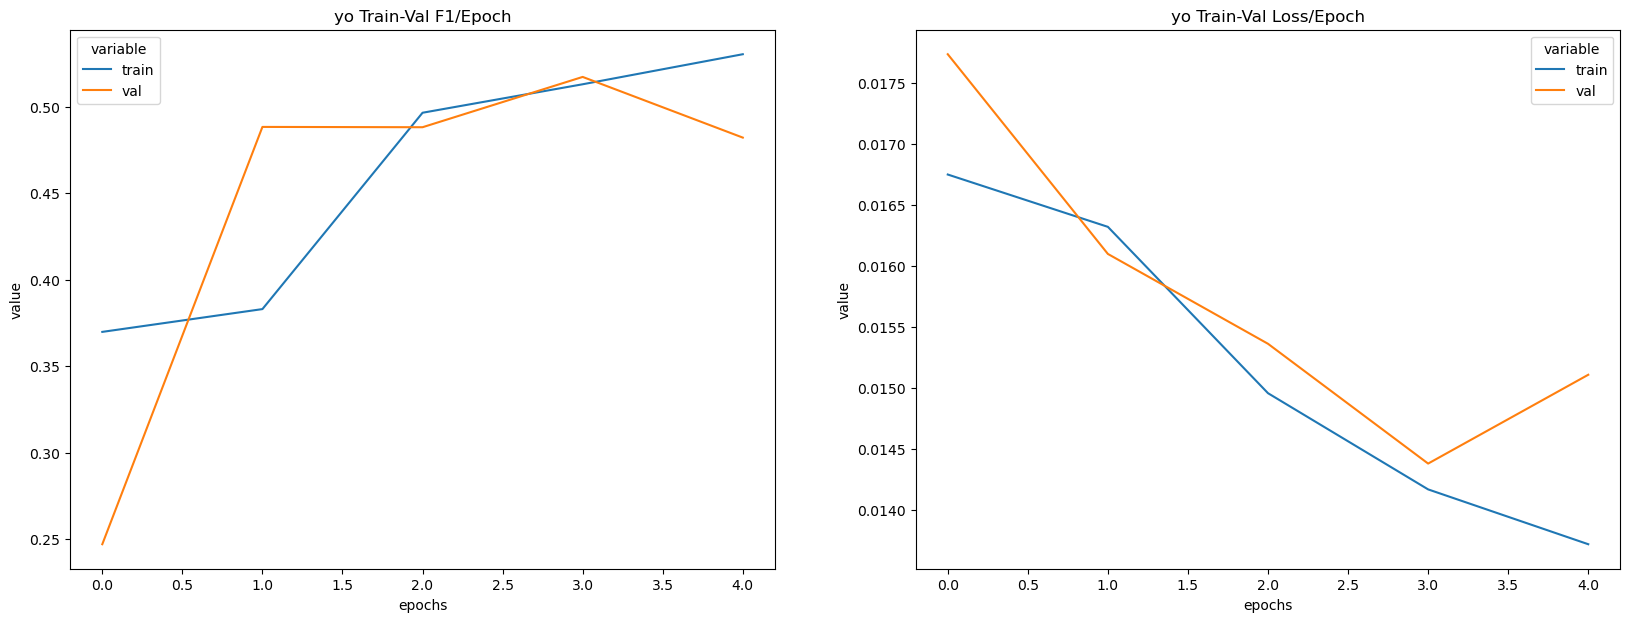

In [25]:

languages = ['am', 'dz', 'ha', 'ig', 'ma', 'pcm', 'pt', 'sw', 'ts', 'twi', 'yo']

for lang in languages:
    with open(f'./bert_multilingual/f1_met_{lang}.pkl', 'rb') as f:
        f1_met = pickle.load(f)

    with open(f'./bert_multilingual/loss_met_{lang}.pkl', 'rb') as f:
        loss_met = pickle.load(f)

    plot_met_curves(f1_met, loss_met, lang)